# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd  # import the neccessary libraries
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor  # In case we want to use k-nearest neighbor model
from sklearn.metrics import mean_squared_error as m_s_e

plt.style.use('seaborn')
sns.set(style="white")

In [2]:
pd.set_option('display.max_columns', 25)  # display all the columns

In [3]:
house = pd.read_csv('kc_house_data_train.csv')  # read in the csv file with train data
print(house.shape)  # check the dimensions of the model
house.head(10)  # print the first 5 rows

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
5,5,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,3,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
6,6,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,4,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
7,7,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,8,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
9,9,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,4,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [4]:
house.dtypes  # check the column types

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.

In [5]:
print(house['id'].nunique())  # check if all rows have a unique id
house['id'].value_counts(dropna = False).head() 

17176


1232000810    2
3558900590    2
3323059027    2
3935900232    2
3630120700    2
Name: id, dtype: int64

* Not all the id values are unique. Are there houses that were sold multiple times? Let's check out some of these entries and see what's going on.

In [6]:
house[(house['id'] == 1232000810) | (house['id'] == 3558900590)]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7491,7491,1232000810,20140912T000000,340000.0,3,2.50,1400,4800,1.0,0,0,3,7,1200,200,1921,0,98117,47.6865,-122.379,1440,3840
11136,11136,1232000810,20150326T000000,537000.0,3,2.50,1400,4800,1.0,0,0,3,7,1200,200,1921,0,98117,47.6865,-122.379,1440,3840
12664,12664,3558900590,20150324T000000,692500.0,6,1.75,2230,10080,1.0,0,0,3,7,1390,840,1969,0,98034,47.7089,-122.201,2110,8475
16139,16139,3558900590,20141125T000000,360000.0,6,1.75,2230,10080,1.0,0,0,3,7,1390,840,1969,0,98034,47.7089,-122.201,2110,8475


* From this, we can conclude that some house were sold multiple times for different prices. Therefore, the **date** a house is sold is related to the price

In [7]:
# let's drop the first two columns as they are not useful for our model
# sqft_living = sqft_above + sqft_basement
house.drop(columns=['Unnamed: 0', 'id','sqft_above','sqft_basement',], inplace=True)

In [8]:
house.isnull().sum().any() # check if there are any null values

False

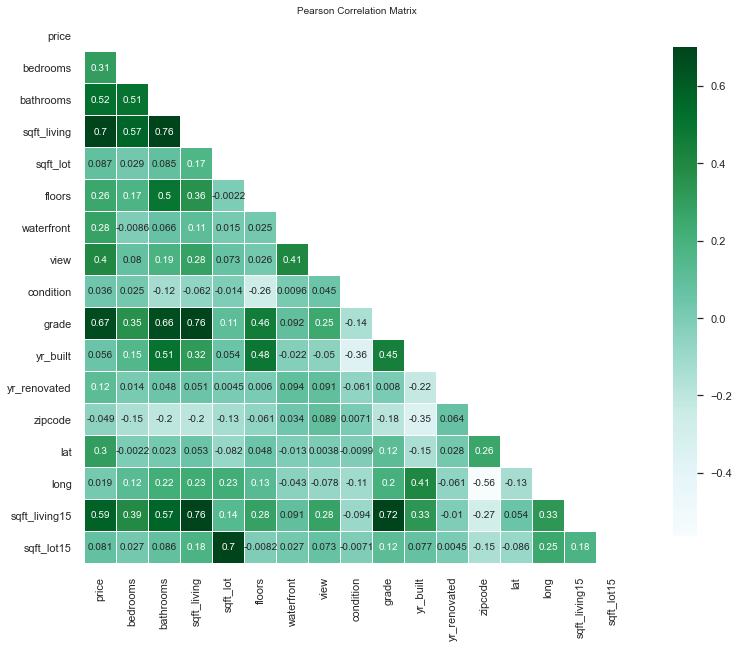

In [9]:
# let's check the correlation between the features

mask = np.zeros_like(house.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 10))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(house.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9});
plt.show()

* we can drop `sqft_living15` since it is highly correlated with 'grade' and 'sqft_above'

In [10]:
# transform 'yr_built' column to a column that tells us how old a house is
house['yrs_old'] = 2016 - house['yr_built']  # create new column to store this data
house.yrs_old.describe()

count    17290.000000
mean        45.207981
std         29.343516
min          1.000000
25%         20.000000
50%         42.000000
75%         65.000000
max        116.000000
Name: yrs_old, dtype: float64

In [11]:
# In the same way, create a column for how long has it been since a house was last renovated
house['yrs_since_renovation'] = house['yr_renovated'].apply(lambda x: (2016 - house['yr_renovated']) if  x > 0 else
                                                            np.nan)

In [12]:
house.yrs_since_renovation.isnull().sum()  # check how many houses have not been renovated

16564

We can drop both these columns related to renovation, since most houses have not been renovated

In [13]:
house['year_sold'] = house['date'].str[0:4].astype(int)  # create a column to check when these houses were sold

In [14]:
house.year_sold.unique()  # check which years these houses have been sold

array([2014, 2015])

This dataset contains only two years of sales data. We can choose to drop this column too.

In [15]:
house.drop(columns = ['yr_built','date', 'yr_renovated','yrs_since_renovation',
                      'sqft_living15'], inplace = True )

In [16]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_lot15,yrs_old,year_sold
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,98058,47.4388,-122.162,7700,30,2014
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,98115,47.6784,-122.285,6283,39,2014
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,98006,47.5646,-122.129,9685,19,2014
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,98034,47.6995,-122.228,14226,26,2015
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,98052,47.6647,-122.083,4050,12,2014


In [17]:
house_scaled = (house - house.mean())/house.std()

In [18]:
house_scaled['price'] = house['price']

In [20]:
from statsmodels.formula.api import ols

lr_model = ols(formula='price~sqft_living+grade+waterfront+view+yrs_old', data=house_scaled).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     6197.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:27:58   Log-Likelihood:            -2.3749e+05
No. Observations:               17290   AIC:                         4.750e+05
Df Residuals:                   17284   BIC:                         4.750e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.407e+05   1699.145    318.242      0.000    5.37e+05    5.44e+05
sqft_living  1.559e+05   2658.004     58.658      0.000    1.51e+05    1.61e+05
grade         1.59e+05   2806.114     56.652      0.000    1.53e+05    1.64e+05
waterfront   5.398e+04   1860.875     29.005      0.000    5.03e+04    5.76e+04
view         3.699e+04   1959.746     18.874      0.000    3.31e+04    4.08e+04
yrs_old      9.692e+04   1934.648     50.099      0.000    9.31e+04    1.01e+05
==============================================================================
Omnibus:                    13691.389   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1133312.106
Skew:                           3.226   Prob(JB):                         0.00
Kurtosis:                      42.134   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
np.random.seed(1)
house_scaled= house_scaled.loc[np.random.permutation(len(house_scaled))]

In [76]:
house_train = house_scaled[:10960]
house_test = house_scaled[10960:]

In [82]:
features = ['sqft_living','grade','waterfront','view','yrs_old']
n_val = [3,5,9]
rmses = []
for n in n_val:
    knn = KNeighborsRegressor(n_neighbors=n, algorithm = 'auto')
    knn.fit(house_train[features], house_train['price'])
    predictions = knn.predict(house_test[features])
    mse = m_s_e(house_test['price'], predictions)
    rmses.append(np.sqrt(mse))
rmses

[229168.00645149942, 217268.83938938545, 212439.85737036995]

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [ ]:
#your code here 

### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [ ]:
# your code here

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/